In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import io
import matplotlib.pylab as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Rezoning/NewYorkCity/master2_2010_2017 (1).csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df=df.replace(np.nan,0)

In [ ]:
df=df.loc[df['yearbuilt']>1800]
df=df.loc[df['landuse']>0]

In [ ]:
bldgclass_dummy=pd.get_dummies(df['bldgclass'])
df= df.merge(bldgclass_dummy,right_index=True,left_index=True)
df.head()

,Unnamed: 0,bbl,geoid,year_x,borough,lot,cd,zipcode,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,ltdheight,allzoning1,allzoning2,splitzone,bldgclass,landuse,easements,ownertype,lotarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,lotfront,lotdepth,otherarea,numbldgs,numfloors,unitsres,lotfront.1,lotdepth.1,...,RZ,S0,S1,S2,S3,S4,S5,S9,T1,T2,T9,U7,V0,V1,V3,V5,W1,W2,W3,W4,W5,W6,W7,W8,W9,Y1,Y2,Y3,Y4,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z8
2,2,2.022600e+09,360050019004,2010,BX,100,201,10454,M3-1,0,0,0,0,0,0,0,0,M3-1,0,N,E9,6.0,0,P,45053,860,0,0,0,0,860,0,301.42,76.58,0,1,1.0,0,301.42,76.58,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5,2.023160e+09,360050019004,2010,BX,1,201,10454,M1-3/R8,0,0,0,0,0,MX-1,0,0,M1-3/R8/MX-1,0,N,G1,10.0,0,P,133700,83064,0,7000,0,76064,0,0,333.08,430.00,0,1,2.0,0,333.08,430.00,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,10,2.025830e+09,360050019004,2010,BX,30,201,10454,M3-1,0,0,0,0,0,0,0,0,M3-1,0,N,F2,6.0,0,P,350500,445625,0,40000,0,0,5000,400625,377.00,986.00,0,1,4.0,0,377.00,986.00,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,12,2.025430e+09,360050019004,2010,BX,30,201,10454,M3-1,0,0,0,0,0,0,0,0,M3-1,0,N,F1,6.0,2,P,54543,47851,0,1000,2000,0,0,44851,439.87,124.00,0,1,1.0,0,439.87,124.00,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,17,2.022600e+09,360050019004,2010,BX,192,201,10454,M3-1,0,0,0,0,0,0,0,0,M3-1,0,N,E1,6.0,0,P,153200,98000,0,0,0,0,98000,0,197.00,567.58,0,1,1.0,0,197.00,567.58,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
ownertype_dummy=pd.get_dummies(df['ownertype'])

In [ ]:
df= df.merge(ownertype_dummy,right_index=True,left_index=True)
df.head()

,Unnamed: 0,bbl,geoid,year_x,borough,lot,cd,zipcode,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,ltdheight,allzoning1,allzoning2,splitzone,bldgclass,landuse,easements,ownertype,lotarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,lotfront,lotdepth,otherarea,numbldgs,numfloors,unitsres,lotfront.1,lotdepth.1,...,S5,S9,T1,T2,T9,U7,V0,V1,V3,V5,W1,W2,W3,W4,W5,W6,W7,W8,W9,Y1,Y2,Y3,Y4,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z8,0,C,M,O,P,X
2,2,2.022600e+09,360050019004,2010,BX,100,201,10454,M3-1,0,0,0,0,0,0,0,0,M3-1,0,N,E9,6.0,0,P,45053,860,0,0,0,0,860,0,301.42,76.58,0,1,1.0,0,301.42,76.58,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,5,2.023160e+09,360050019004,2010,BX,1,201,10454,M1-3/R8,0,0,0,0,0,MX-1,0,0,M1-3/R8/MX-1,0,N,G1,10.0,0,P,133700,83064,0,7000,0,76064,0,0,333.08,430.00,0,1,2.0,0,333.08,430.00,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10,10,2.025830e+09,360050019004,2010,BX,30,201,10454,M3-1,0,0,0,0,0,0,0,0,M3-1,0,N,F2,6.0,0,P,350500,445625,0,40000,0,0,5000,400625,377.00,986.00,0,1,4.0,0,377.00,986.00,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12,12,2.025430e+09,360050019004,2010,BX,30,201,10454,M3-1,0,0,0,0,0,0,0,0,M3-1,0,N,F1,6.0,2,P,54543,47851,0,1000,2000,0,0,44851,439.87,124.00,0,1,1.0,0,439.87,124.00,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
17,17,2.022600e+09,360050019004,2010,BX,192,201,10454,M3-1,0,0,0,0,0,0,0,0,M3-1,0,N,E1,6.0,0,P,153200,98000,0,0,0,0,98000,0,197.00,567.58,0,1,1.0,0,197.00,567.58,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df2010= df.loc[df['year_x']==2010]

In [ ]:
df2010.shape

(819625, 273)

In [ ]:
#df10_15=df.loc[df['year_x']<2016]
#df10_15.to_csv('/content/drive/MyDrive/Rezoning/NewYorkCity/master_2010_15.csv')
df2010.to_csv('/content/drive/MyDrive/Rezoning/NewYorkCity/master_2010.csv')

In [ ]:
#df10_15.to_csv('/content/drive/MyDrive/Rezoning/NewYorkCity/master_2010_15.csv')
df2010.to_csv('/content/drive/MyDrive/Rezoning/NewYorkCity/master_2010.csv')

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import io
import matplotlib.pylab as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
df2010=pd.read_csv('/content/drive/MyDrive/Rezoning/NewYorkCity/master_2010.csv')
#df10_15=pd.read_csv('/content/drive/MyDrive/Rezoning/NewYorkCity/master_2010_15.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,11,12,13,14,15,16,17,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df2010['borough'].unique()

array(['BX', 'BK', 'MN', 'QN', 'SI'], dtype=object)

In [ ]:
dfgroup= df2010.groupby(by='borough').count()
dfgroup

,Unnamed: 0,Unnamed: 0.1,bbl,geoid,year_x,lot,cd,zipcode,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,ltdheight,allzoning1,allzoning2,splitzone,bldgclass,landuse,easements,ownertype,lotarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,lotfront,lotdepth,otherarea,numbldgs,numfloors,unitsres,lotfront.1,lotdepth.1,...,S5,S9,T1,T2,T9,U7,V0,V1,V3,V5,W1,W2,W3,W4,W5,W6,W7,W8,W9,Y1,Y2,Y3,Y4,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z8,0,C,M,O,P,X
borough,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BK,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,...,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571,268571
BX,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,...,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841,82841
MN,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,...,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734,40734
QN,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,...,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164,315164
SI,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,...,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315,112315


In [ ]:
dfM= df2010.loc[df2010['borough']=='MN']
dfB=df2010.loc[df2010['borough']=='BK']
dfQ=df2010.loc[df2010['borough']=='QN']

In [ ]:
dfB.shape

(268571, 273)

In [ ]:
dfM.shape

(40734, 273)

In [ ]:
dfQ.shape

(315164, 273)

In [ ]:
# Let's take'label'as the target variable. 
y=dfM.loc[:,'landuse']
y=pd.get_dummies(y)

X=dfM[[ 'easements',
       'numbldgs', 'numfloors', 'unitsres',
       'lotfront.1', 'lotdepth.1', 'assessland', 'assesstot', 'yearbuilt',
       'builtfar', 'maxallwfar', 'residfar', 'commfar', 'facilfar', 'statefp',
       'countyfp', 'tractce', 'blkgrpce', 'med_income', 'population',
        'income_pc', 'housing_units', 'subway_scale', '%low_educ', 'noisePerCapita', 
       'built_green']]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)


In [ ]:
OS=[]
for i in range(2,500,25):
    
    dt = DecisionTreeClassifier(max_leaf_nodes=i)
    dt.fit(X_train,y_train)
    OS.append(dt.score(X_test,y_test))
plt.figure(figsize=(7,5))
plt.plot(range(2,500,25),OS)
plt.xlabel("Max leaf nodes")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Simplicity (max leaf nodes)")
plt.xlim(2,500)
plt.show()

In [ ]:
param_grid = {'max_depth':range(1,11),'max_leaf_nodes':range(2,500,25)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc')
%time rs=gr.fit(X_train,y_train)
print (rs.best_params_)
print ('Out of sample accuracy:',rs.score(X_test,y_test))

CPU times: user 4min 34s, sys: 545 ms, total: 4min 34s
Wall time: 4min 33s
{'max_depth': 7, 'max_leaf_nodes': 52}
Out of sample accuracy: 0.9287456835665431


In [ ]:
dt = DecisionTreeClassifier(max_depth=7, max_leaf_nodes= 52)
%time dt.fit(X_train, y_train)
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 10 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:10,:]

CPU times: user 392 ms, sys: 981 µs, total: 393 ms
Wall time: 391 ms


,variables,importance
3,unitsres,0.468969
2,numfloors,0.185969
10,maxallwfar,0.14167
9,builtfar,0.0575963
16,tractce,0.0434393
4,lotfront.1,0.0246721
5,lotdepth.1,0.0229957
7,assesstot,0.0127636
25,built_green,0.0120988
22,subway_scale,0.0110941


In [ ]:
param_grid ={'max_depth':range(1,11),'max_leaf_nodes':range(2,500,25),'n_estimators':range(1,51,5)}
dt=RandomForestClassifier(n_jobs=-1,max_leaf_nodes=52)
gr=GridSearchCV(dt,param_grid=param_grid)
%time rs= gr.fit(X_train,y_train)
print (rs.best_params_)
print ('Out of sample accuracy:',rs.score(X_test,y_test))

CPU times: user 40min 27s, sys: 3min 21s, total: 43min 48s
Wall time: 2h 21min 22s
{'max_depth': 10, 'max_leaf_nodes': 402, 'n_estimators': 6}
Out of sample accuracy: 0.5970051550609606


In [ ]:
param_grid ={'n_estimators':range(1,51,5)}
dt=RandomForestClassifier(n_jobs=-1,max_leaf_nodes=52)
gr=GridSearchCV(dt,param_grid=param_grid)
%time rs= gr.fit(X_train,y_train)
print (rs.best_params_)
print ('Out of sample accuracy:',rs.score(X_test,y_test))

CPU times: user 18 s, sys: 1.05 s, total: 19.1 s
Wall time: 50.5 s
{'n_estimators': 41}
Out of sample accuracy: 0.5020047459291384


In [ ]:
rf = RandomForestClassifier(n_estimators=6, n_jobs=-1,max_leaf_nodes=402,max_depth=10)
rf.fit(X_train, y_train)
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 10 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:10,:]

,variables,importance
3,unitsres,0.323854
7,assesstot,0.102813
2,numfloors,0.0951228
9,builtfar,0.0690806
6,assessland,0.0662407
5,lotdepth.1,0.0509757
10,maxallwfar,0.0502329
25,built_green,0.0382755
16,tractce,0.0378869
4,lotfront.1,0.0338627


In [ ]:
y=dfQ.loc[:,'landuse']
y=pd.get_dummies(y)

X=dfQ[[ 'easements',
       'numbldgs', 'numfloors', 'unitsres',
       'lotfront.1', 'lotdepth.1', 'assessland', 'assesstot', 'yearbuilt',
       'builtfar', 'maxallwfar', 'residfar', 'commfar', 'facilfar', 'statefp',
       'countyfp', 'tractce', 'blkgrpce', 'med_income', 'population',
        'income_pc', 'housing_units', 'subway_scale', '%low_educ', 'noisePerCapita', 
       'built_green']]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)

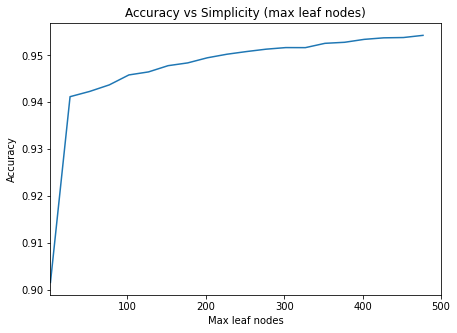

In [ ]:
# Let's take'label'as the target variable. 
y=dfQ.loc[:,'landuse']
y=pd.get_dummies(y)

X=dfQ[[ 'easements',
       'numbldgs', 'numfloors', 'unitsres',
       'lotfront.1', 'lotdepth.1', 'assessland', 'assesstot', 'yearbuilt',
       'builtfar', 'maxallwfar', 'residfar', 'commfar', 'facilfar', 'statefp',
       'countyfp', 'tractce', 'blkgrpce', 'med_income', 'population',
        'income_pc', 'housing_units', 'subway_scale', '%low_educ', 'noisePerCapita', 
       'built_green']]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)
OS=[]
for i in range(2,500,25):
    
    dt = DecisionTreeClassifier(max_leaf_nodes=i)
    dt.fit(X_train,y_train)
    OS.append(dt.score(X_test,y_test))
plt.figure(figsize=(7,5))
plt.plot(range(2,500,25),OS)
plt.xlabel("Max leaf nodes")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Simplicity (max leaf nodes)")
plt.xlim(2,500)
plt.show()

In [ ]:
param_grid = {'max_depth':range(1,11),'max_leaf_nodes':range(2,500,25)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc')
%time rs=gr.fit(X_train,y_train)
print (rs.best_params_)
print ('Out of sample accuracy:',rs.score(X_test,y_test))

CPU times: user 57min 19s, sys: 5.77 s, total: 57min 24s
Wall time: 57min 7s
{'max_depth': 5, 'max_leaf_nodes': 27}
Out of sample accuracy: 0.9726037988040518


In [ ]:
dt = DecisionTreeClassifier(max_depth=5, max_leaf_nodes= 27)
%time dt.fit(X_train, y_train)
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 10 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:10,:]

CPU times: user 4.52 s, sys: 7.75 ms, total: 4.52 s
Wall time: 4.5 s


,variables,importance
3,unitsres,0.86739
7,assesstot,0.0365879
2,numfloors,0.0321526
9,builtfar,0.0267977
10,maxallwfar,0.0247809
8,yearbuilt,0.0100055
6,assessland,0.00170693
18,med_income,0.000457942
16,tractce,0.000120205
17,blkgrpce,0


In [ ]:
param_grid ={'max_depth':range(1,11),'n_estimators':range(1,51,5)}
dt=RandomForestClassifier(n_jobs=-1,max_leaf_nodes=7)
gr=GridSearchCV(dt,param_grid=param_grid)
%time rs= gr.fit(X_train,y_train)
print (rs.best_params_)
print ('Out of sample accuracy:',rs.score(X_test,y_test))

CPU times: user 15min 49s, sys: 26.9 s, total: 16min 16s
Wall time: 41min 32s
{'max_depth': 8, 'n_estimators': 21}
Out of sample accuracy: 0.8923320994182972


In [ ]:
rf = RandomForestClassifier(n_estimators=21, n_jobs=-1,max_depth=8)
rf.fit(X_train, y_train)
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 10 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:10,:]

,variables,importance
3,unitsres,0.423184
2,numfloors,0.15235
7,assesstot,0.144095
9,builtfar,0.0755053
10,maxallwfar,0.0624665
6,assessland,0.0616626
4,lotfront.1,0.0244176
8,yearbuilt,0.0138721
25,built_green,0.012077
18,med_income,0.00591752


In [ ]:
y=dfB.loc[:,'landuse']
y=pd.get_dummies(y)

X=dfB[[ 'easements',
        
       'lotfront.1', 'lotdepth.1', 'yearbuilt',
        'statefp',
       'countyfp', 'blkgrpce', 'med_income', 'population',
        'income_pc', 'housing_units', 'subway_scale', '%low_educ', 'noisePerCapita', 
       'built_green']]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)
OS=[]

In [ ]:
# Let's take'label'as the target variable. 
y=dfB.loc[:,'landuse']
y=pd.get_dummies(y)

X=dfB[[ 'easements',
        
       'lotfront.1', 'lotdepth.1', 'assessland', 'assesstot', 'yearbuilt',
        'statefp',
       'countyfp', 'tractce', 'blkgrpce', 'med_income', 'population',
        'income_pc', 'housing_units', 'subway_scale', '%low_educ', 'noisePerCapita', 
       'built_green']]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)
OS=[]
for i in range(2,500,25):
    
    dt = DecisionTreeClassifier(max_leaf_nodes=i)
    dt.fit(X_train,y_train)
    OS.append(dt.score(X_test,y_test))
plt.figure(figsize=(7,5))
plt.plot(range(2,500,25),OS)
plt.xlabel("Max leaf nodes")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Simplicity (max leaf nodes)")
plt.xlim(2,500)
plt.show()

KeyboardInterrupt: ignored

In [ ]:
param_grid ={'max_leaf_nodes':range(2,500,25)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid)
rs= gr.fit(X_train,y_train)
print (rs.best_params_)
print ('Out of sample accuracy:',rs.score(X_test,y_test))

KeyboardInterrupt: ignored

In [ ]:
param_grid = {'max_depth':range(1,11),'max_leaf_nodes':range(2,500,25)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc')
%time rs=gr.fit(X_train,y_train)
print (rs.best_params_)
print ('Out of sample accuracy:',rs.score(X_test,y_test))

CPU times: user 33min 49s, sys: 4.03 s, total: 33min 54s
Wall time: 33min 46s
{'max_depth': 10, 'max_leaf_nodes': 302}
Out of sample accuracy: 0.8448052473338232


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=iris.target_names, index=iris.target_names)
cm

In [ ]:
dt = DecisionTreeClassifier(max_depth=10, max_leaf_nodes= 277)
%time dt.fit(X_train, y_train)
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 10 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:10,:]

CPU times: user 2.89 s, sys: 14 ms, total: 2.9 s
Wall time: 2.88 s


,variables,importance
3,yearbuilt,0.288315
1,lotfront.1,0.240611
11,subway_scale,0.237846
14,built_green,0.0815567
2,lotdepth.1,0.049817
7,med_income,0.0281455
12,%low_educ,0.0216565
9,income_pc,0.0150263
13,noisePerCapita,0.0120628
8,population,0.00996776


In [ ]:
param_grid ={'n_estimators':range(1,51,5)}
dt=RandomForestClassifier(n_jobs=-1,max_leaf_nodes=6)
gr=GridSearchCV(dt,param_grid=param_grid)
%time rs= gr.fit(X_train,y_train)
print (rs.best_params_)
print ('Out of sample accuracy:',rs.score(X_test,y_test))

CPU times: user 1min 31s, sys: 2.36 s, total: 1min 33s
Wall time: 3min 44s
{'n_estimators': 21}
Out of sample accuracy: 0.8307476542719555


In [ ]:
rf = RandomForestClassifier(n_estimators=21, n_jobs=-1,max_leaf_nodes=6)
rf.fit(X_train, y_train)
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 10 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:10,:]

,variables,importance
3,unitsres,0.352039
2,numfloors,0.219964
9,builtfar,0.157858
7,assesstot,0.127331
6,assessland,0.0554792
10,maxallwfar,0.0335018
25,built_green,0.0177606
4,lotfront.1,0.0171017
16,tractce,0.00893682
22,subway_scale,0.00405786


In [ ]:
Feature_importance.sort_values(by="importance",ascending=False).iloc[:30,:]

,variables,importance
3,unitsres,0.352039
2,numfloors,0.219964
9,builtfar,0.157858
7,assesstot,0.127331
6,assessland,0.0554792
10,maxallwfar,0.0335018
25,built_green,0.0177606
4,lotfront.1,0.0171017
16,tractce,0.00893682
22,subway_scale,0.00405786


digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="unitsres <= 2.5, samples = 573737, value = [[176196, 397541], [481857, 91880], [565540, 8197], [539722, 34015], [556491, 17246], [564483, 9254], [570754, 2983], [565506, 8231], [572894, 843], [570278, 3459], [573649, 88]]", fillcolor="#f4caab"] ;
1 [label="comarea <= 12.0, samples = 457181, value = [[59663, 397518], [456774, 407], [456934, 247], [439573, 17608], [440197, 16984], [448089, 9092], [454205, 2976], [449216, 7965], [456340, 841], [453726, 3455], [457093, 88]]", fillcolor="#eca571"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="resarea <= 2.5, samples = 400023, value = [[2538, 397485], [399642, 381], [399874, 149], [399965, 58], [399995, 28], [400011, 12], [399982, 41], [399903, 120], [399894, 129], [398489, 1534], [399937, 86]]", fillcolor="#e5833c"] ;
1 -> 2 ;
3 [label="G0 <= 0.5, samples = 2023, value = [[1835, 188]

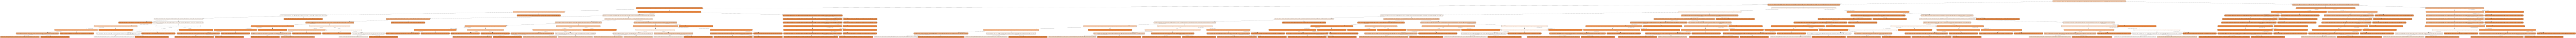

In [ ]:
from sklearn import tree
from IPython.display import Image  
import pydotplus
import cv2

dt = DecisionTreeClassifier(max_depth=10) 
dt.fit(X_train,y_train)

thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print(thestring)
graph = pydotplus.graph_from_dot_data(thestring) 
# pydot_graph= pydotplus.graph_from_dot_data(stream.getvalue()) 
graph.set_size('"55,15!"')
Image(graph.create_png())